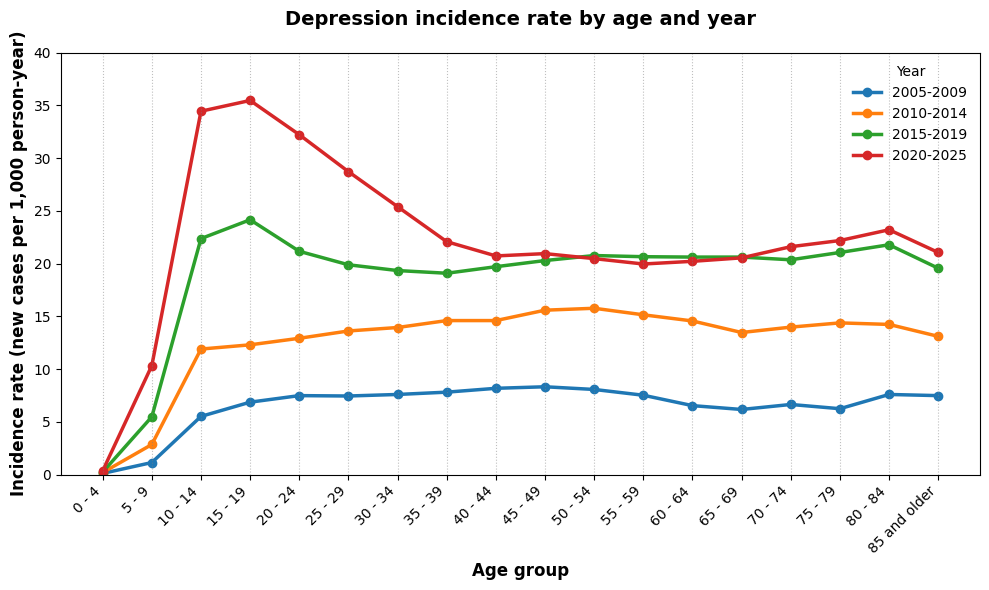

Graph 1: Depression Diagnosis


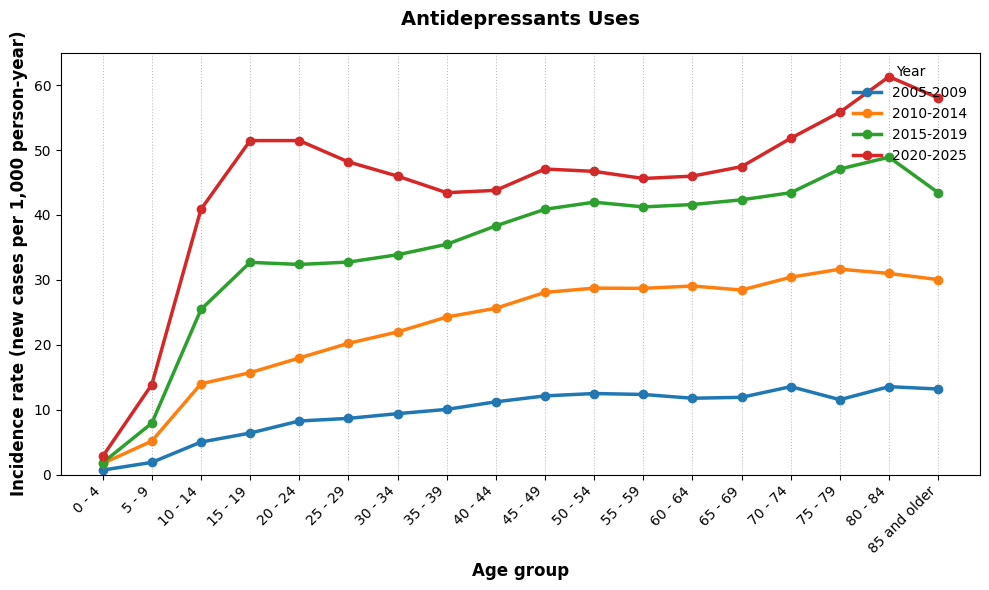

 Graph 2: Antidepressant Uses


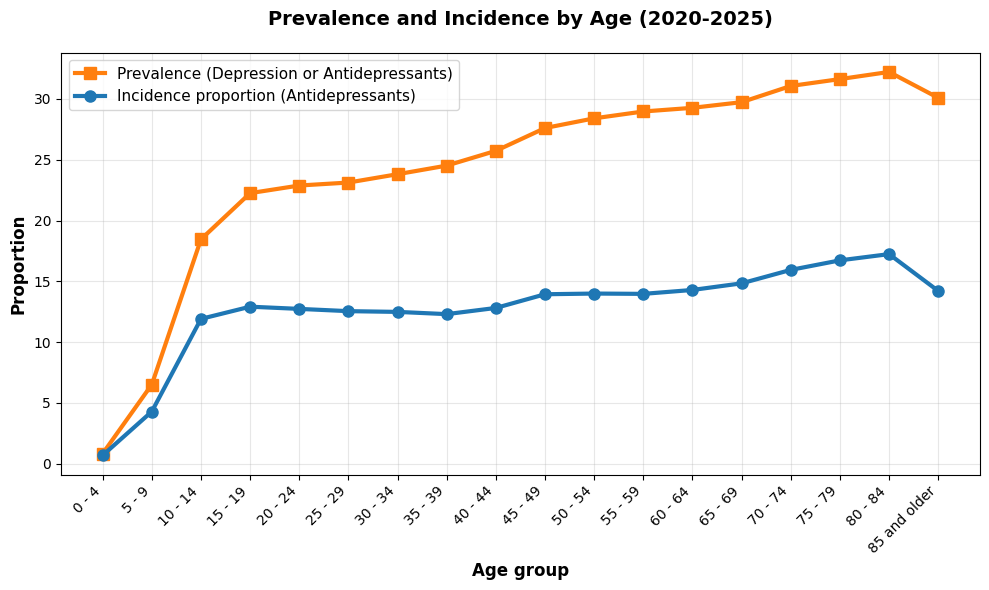


Verifying plotted values (Age 10-14, 2020):
Prevalence (Dep OR AD): 18.5%
Incidence (AD): 11.9%


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

CSV_PATH = "Depression.In.Women.csv"
df = pd.read_csv(CSV_PATH)
df.columns = df.columns.str.strip()

rename_map = {
    "Time Window": "Year",
    "Age_Strata": "Age",
    "Incidence Proportion (Depression)": "Inc_Dep",
    "Prevalence(Depression)": "Prev_Dep",
    "Incidence Rate (cases/person-day)(Depression)": "Rate_Dep",
    "Incidence Proportion (antidepressant uses)": "Inc_AD",
    "Prevalence (antidepressant uses)": "Prev_AD",
    "Incidence Rate (cases/person-day) (antidepressant uses)": "Rate_AD",
    "Incidence Proportion (Depression or antidepressants)": "Inc_Either",
    "Prevalence (Depression or antidepressants)": "Prev_Either",
    "Incidence Rate (cases/person-day)  (Depression or antidepressants)": "Rate_Either"
}
df = df.rename(columns={k: v for k, v in rename_map.items() if k in df.columns})

# Order age groups
def age_lower_bound(s: str) -> float:
    s = str(s).strip().lower()
    if "older" in s:
        return 85.0
    s = s.replace(" ", "")
    if "-" in s:
        try:
            return float(s.split("-")[0])
        except Exception:
            return np.nan
    try:
        return float(s)
    except Exception:
        return np.nan

df["AgeKey"] = df["Age"].map(age_lower_bound)

age_order = (
    df[["Age", "AgeKey"]]
    .drop_duplicates()
    .sort_values("AgeKey")
    .loc[:, "Age"]
    .tolist()
)
df["Age"] = pd.Categorical(df["Age"], categories=age_order, ordered=True)

# Per-year
years = sorted(df["Year"].unique())
df_by_year = {y: df[df["Year"] == y].sort_values("Age") for y in years}

period_labels = {
    2005: "2005-2009",
    2010: "2010-2014",
    2015: "2015-2019",
    2020: "2020-2025"
}

colors = {2005: '#1f77b4', 2010: '#ff7f0e', 2015: '#2ca02c', 2020: '#d62728'}

# Calculate rates per 1,000 person-years
for y in years:
    df_by_year[y] = df_by_year[y].copy()
    df_by_year[y]["Rate_Dep_per1000py"] = df_by_year[y]["Rate_Dep"] * 365.0 * 1000.0
    df_by_year[y]["Rate_AD_per1000py"] = df_by_year[y]["Rate_AD"] * 365.0 * 1000.0
    df_by_year[y]["Rate_Either_per1000py"] = df_by_year[y]["Rate_Either"] * 365.0 * 1000.0

peak_ages = ["10 - 14", "15 - 19"]
peak_indices = [age_order.index(age) for age in peak_ages if age in age_order]

# Graph 1: Depression Diagnosis
fig, ax = plt.subplots(figsize=(10, 6))

for y in years:
    d = df_by_year[y]
    ax.plot(d["Age"], d["Rate_Dep_per1000py"],
            marker="o", linewidth=2.5, markersize=6,
            label=period_labels[y],
            color=colors[y])

ax.set_xticks(range(len(age_order)))
ax.set_xticklabels(age_order, rotation=45, ha="right", fontsize=10)
ax.set_xlabel("Age group", fontsize=12, fontweight='bold')
ax.set_ylabel("Incidence rate (new cases per 1,000 person-year)",
              fontsize=12, fontweight='bold')
ax.set_title("Depression incidence rate by age and year",
             fontsize=14, fontweight='bold', pad=20)

ax.legend(title="Year", loc="upper right", frameon=False, fontsize=10)
ax.set_ylim(0, 40)

for i in range(len(age_order)):
    ax.axvline(x=i, color='gray', linestyle=':', linewidth=0.8, alpha=0.5)

plt.tight_layout()
plt.savefig("G1_Depression_Diagnosis_2020-2025.png", dpi=300, bbox_inches='tight')
plt.show()
print("Graph 1: Depression Diagnosis")

# GRAPH 2: Antidepressants Uses

fig, ax = plt.subplots(figsize=(10, 6))

for y in years:
    d = df_by_year[y]
    ax.plot(d["Age"], d["Rate_AD_per1000py"],
            marker="o", linewidth=2.5, markersize=6,
            label=period_labels[y],
            color=colors[y])

ax.set_xticks(range(len(age_order)))
ax.set_xticklabels(age_order, rotation=45, ha="right", fontsize=10)
ax.set_xlabel("Age group", fontsize=12, fontweight='bold')
ax.set_ylabel("Incidence rate (new cases per 1,000 person-year)",
              fontsize=12, fontweight='bold')
ax.set_title("Antidepressants Uses",
             fontsize=14, fontweight='bold', pad=20)

ax.legend(title="Year", loc="upper right", frameon=False, fontsize=10)
ax.set_ylim(0, 65)

for i in range(len(age_order)):
    ax.axvline(x=i, color='gray', linestyle=':', linewidth=0.8, alpha=0.5)

plt.tight_layout()
plt.savefig("G2_Antidepressants_Uses_2020-2025.png", dpi=300, bbox_inches='tight')
plt.show()
print(" Graph 2: Antidepressant Uses")

# Graph 3
d = df_by_year[2020]

fig, ax = plt.subplots(figsize=(10, 6))

# Prevalence
ax.plot(d["Age"], d["Prev_Either"] * 100,  # ← Column: "Prevalence (Depression or antidepressants)"
        marker="s", linewidth=3, markersize=8,
        label="Prevalence (Depression or Antidepressants)",
        color='#ff7f0e')  # Orange

# INcidence
ax.plot(d["Age"], d["Inc_AD"] * 100,  # ← Column: "Incidence Proportion (antidepressant uses)"
        marker="o", linewidth=3, markersize=8,
        label="Incidence proportion (Antidepressants)",
        color='#1f77b4')  # Blue

ax.set_xticks(range(len(age_order)))
ax.set_xticklabels(age_order, rotation=45, ha="right", fontsize=10)
ax.set_xlabel("Age group", fontsize=12, fontweight='bold')
ax.set_ylabel("Proportion", fontsize=12, fontweight='bold')
ax.set_title("Prevalence and Incidence by Age (2020-2025)",
             fontsize=14, fontweight='bold', pad=20)

ax.legend(loc="upper left", frameon=True, fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig("G3_Prevalence_Incidence_Corrected.png", dpi=300, bbox_inches='tight')
plt.show()

print("\nVerifying plotted values (Age 10-14, 2020):")
age_10_14 = d[d["Age"] == "10 - 14"]
print(f"Prevalence (Dep OR AD): {age_10_14['Prev_Either'].values[0]*100:.1f}%")
print(f"Incidence (AD): {age_10_14['Inc_AD'].values[0]*100:.1f}%")

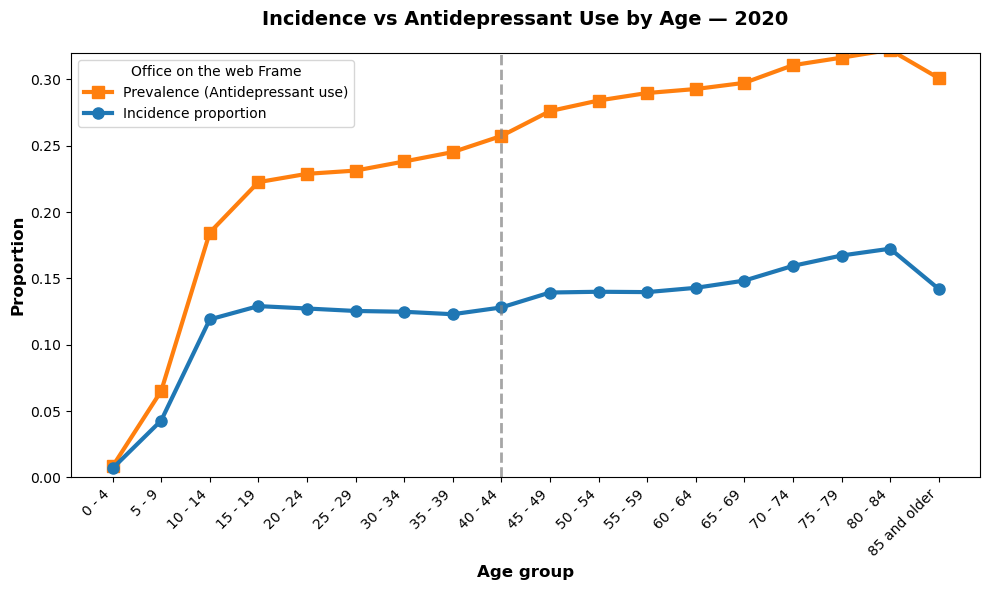

 Graph 3: Prevalence (existing) + Incidence (new), 2020-2025


In [ ]:
d = df_by_year[2020]

fig, ax = plt.subplots(figsize=(10, 6))

# Prevalence of Depression OR Antidepressants (existing patients)
ax.plot(d["Age"], d["Prev_Either"],
        marker="s", linewidth=3, markersize=8,
        label="Prevalence (Antidepressant use)",
        color='#ff7f0e')  # Orange

# Incidence of Antidepressants (new users)
ax.plot(d["Age"], d["Inc_AD"],
        marker="o", linewidth=3, markersize=8,
        label="Incidence proportion",
        color='#1f77b4')  # Blue

# Vertical DAshed line
age40_idx = (d["AgeKey"] - 40).abs().idxmin()
xpos = list(d["Age"]).index(d.loc[age40_idx, "Age"])
ax.axvline(x=xpos, linestyle='--', linewidth=2, color='gray', alpha=0.7)

ax.set_xticks(range(len(age_order)))
ax.set_xticklabels(age_order, rotation=45, ha="right", fontsize=10)
ax.set_xlabel("Age group", fontsize=12, fontweight='bold')
ax.set_ylabel("Proportion", fontsize=12, fontweight='bold')
ax.set_title("Incidence vs Antidepressant Use by Age — 2020",
             fontsize=14, fontweight='bold', pad=20)

ax.legend(loc="upper left", frameon=True, fontsize=10,
          title="Office on the web Frame")
ax.set_ylim(0, 0.32)

plt.tight_layout()
plt.savefig("G3_Prevalence_Incidence_2020.png", dpi=300, bbox_inches='tight')
plt.show()
print(" Graph 3: Prevalence (existing) + Incidence (new), 2020-2025")

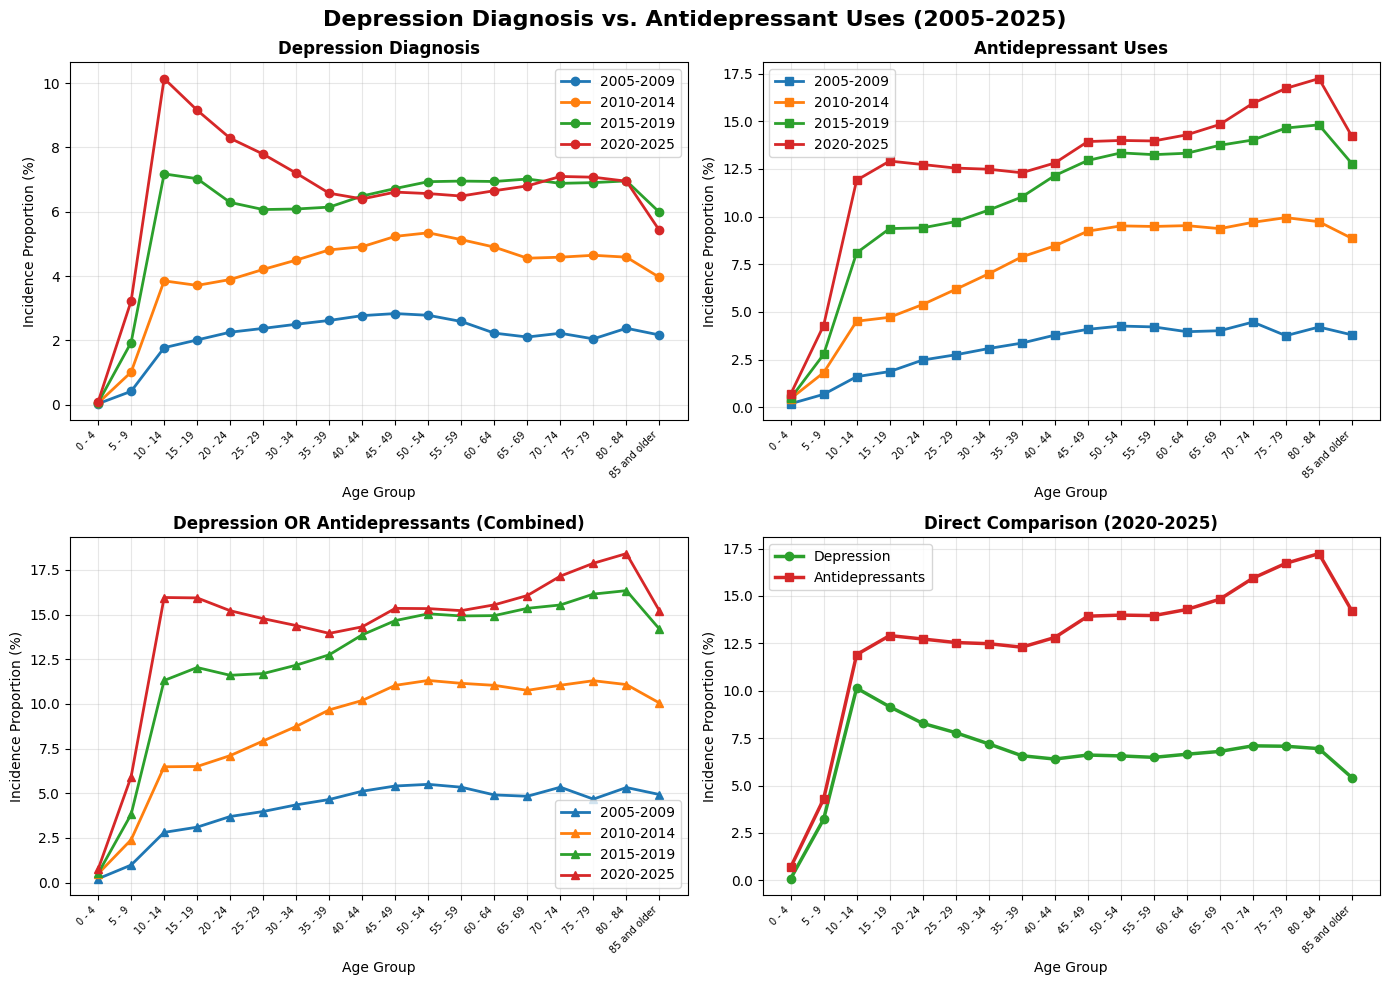

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Alternative 2x2: Panel 1 = All Depression, Panel 2 = All Antidepressants, etc.

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Panel 1: Depression Incidence (all periods)
ax = axes[0, 0]
for y in years:
    d = df_by_year[y]
    ax.plot(d["Age"], d["Inc_Dep"] * 100, marker="o", linewidth=2,
            label=period_labels[y], color=colors[y])
ax.set_title("Depression Diagnosis", fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

# Panel 2: Antidepressant Incidence (all periods)
ax = axes[0, 1]
for y in years:
    d = df_by_year[y]
    ax.plot(d["Age"], d["Inc_AD"] * 100, marker="s", linewidth=2,
            label=period_labels[y], color=colors[y])
ax.set_title("Antidepressant Uses", fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

# Panel 3: Combined (Depression OR Antidepressants) - all periods
ax = axes[1, 0]
for y in years:
    d = df_by_year[y]
    ax.plot(d["Age"], d["Inc_Either"] * 100, marker="^", linewidth=2,
            label=period_labels[y], color=colors[y])
ax.set_title("Depression OR Antidepressants (Combined)", fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

# Panel 4: Direct Comparison (2020-2025 only)
ax = axes[1, 1]
d = df_by_year[2020]
ax.plot(d["Age"], d["Inc_Dep"] * 100, marker="o", linewidth=2.5,
        label="Depression", color='#2ca02c')
ax.plot(d["Age"], d["Inc_AD"] * 100, marker="s", linewidth=2.5,
        label="Antidepressants", color='#d62728')
ax.set_title("Direct Comparison (2020-2025)", fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

# Format all axes
for ax in axes.flat:
    ax.set_xlabel("Age Group", fontsize=10)
    ax.set_ylabel("Incidence Proportion (%)", fontsize=10)
    ax.set_xticks(range(len(age_order)))
    ax.set_xticklabels(age_order, rotation=45, ha="right", fontsize=7)

fig.suptitle("Depression Diagnosis vs. Antidepressant Uses (2005-2025)",
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig("G3_2x2_Alternative.png", dpi=300, bbox_inches='tight')
plt.show()

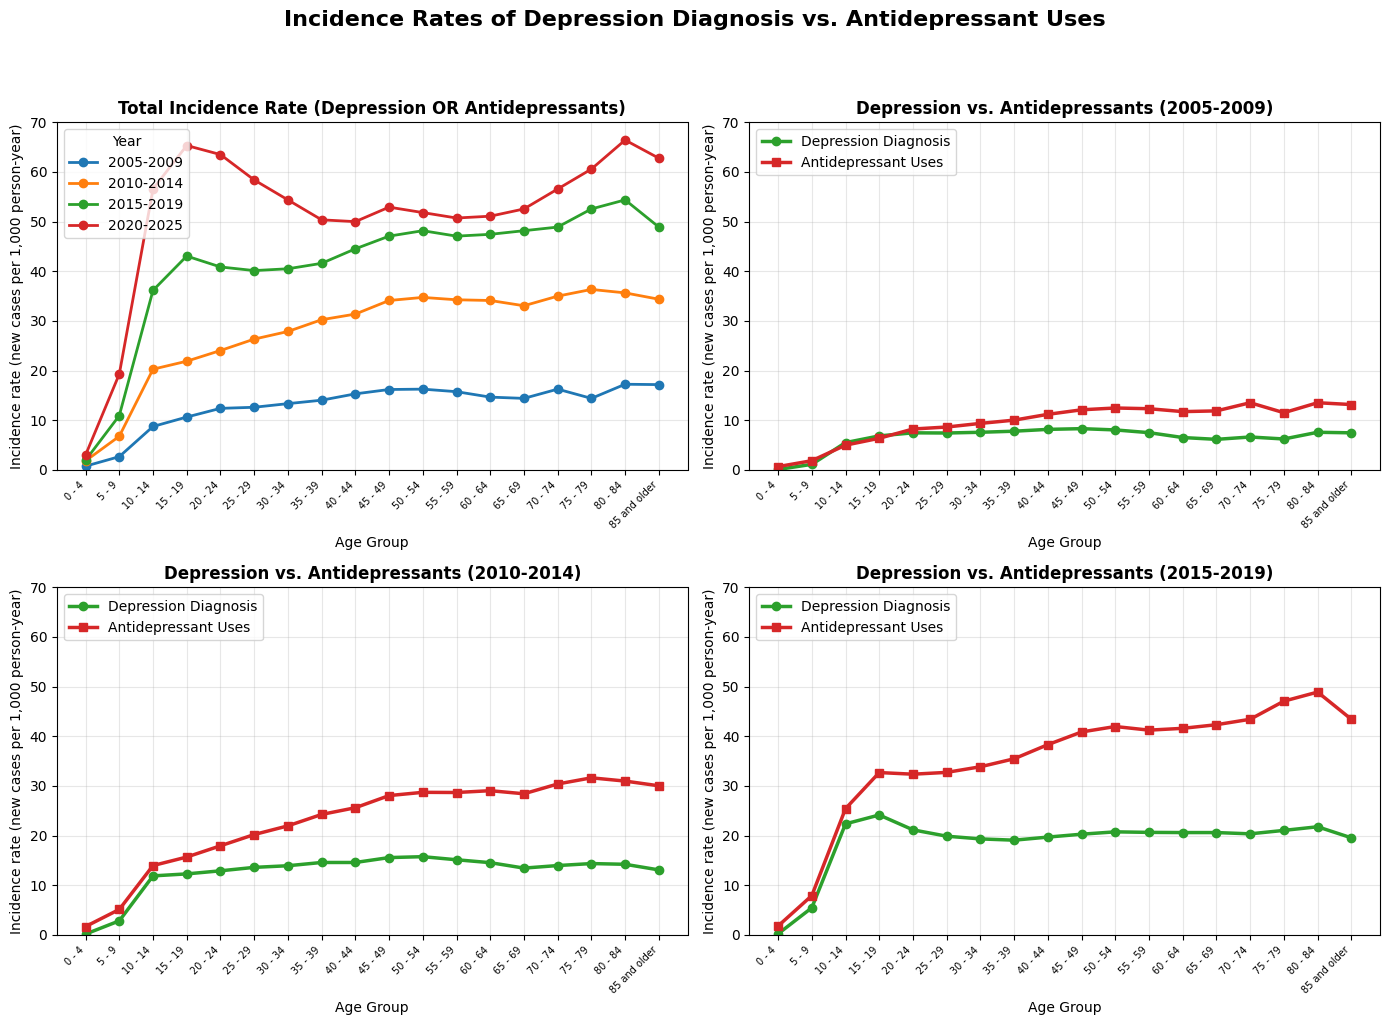

In [18]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Panel [0,0]: Total Incidence Rates (Depression OR Antidepressants) for all periods
ax = axes[0, 0]
for y in years:
    d = df_by_year[y]
    ax.plot(d["Age"], d["Rate_Either_per1000py"], marker="o", linewidth=2,
            label=period_labels[y], color=colors[y])
ax.set_title("Total Incidence Rate (Depression OR Antidepressants)", fontweight='bold')
ax.legend(title="Year", loc="upper left")
ax.grid(True, alpha=0.3)

# Panels for Depression vs Antidepressant Incidence Rates for specific years
comparison_years = [2005, 2010, 2015] # Choosing 3 years to fit 2x2 grid with the first panel
panel_coords = [(0, 1), (1, 0), (1, 1)]

for i, year in enumerate(comparison_years):
    ax = axes[panel_coords[i]]
    d = df_by_year[year]
    ax.plot(d["Age"], d["Rate_Dep_per1000py"], marker="o", linewidth=2.5,
            label="Depression Diagnosis", color='#2ca02c')
    ax.plot(d["Age"], d["Rate_AD_per1000py"], marker="s", linewidth=2.5,
            label="Antidepressant Uses", color='#d62728')
    ax.set_title(f"Depression vs. Antidepressants ({period_labels[year]})", fontweight='bold')
    ax.legend(loc="upper left")
    ax.grid(True, alpha=0.3)

# Format all axes
for ax in axes.flat:
    ax.set_xlabel("Age Group", fontsize=10)
    ax.set_ylabel("Incidence rate (new cases per 1,000 person-year)", fontsize=10)
    ax.set_xticks(range(len(age_order)))
    ax.set_xticklabels(age_order, rotation=45, ha="right", fontsize=7)
    ax.set_ylim(0, 70) # Set consistent y-axis limit

fig.suptitle("Incidence Rates of Depression Diagnosis vs. Antidepressant Uses",
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust layout to prevent suptitle overlap
plt.savefig("G_Combined_Incidence_Rates_2x2.png", dpi=300, bbox_inches='tight')
plt.show()

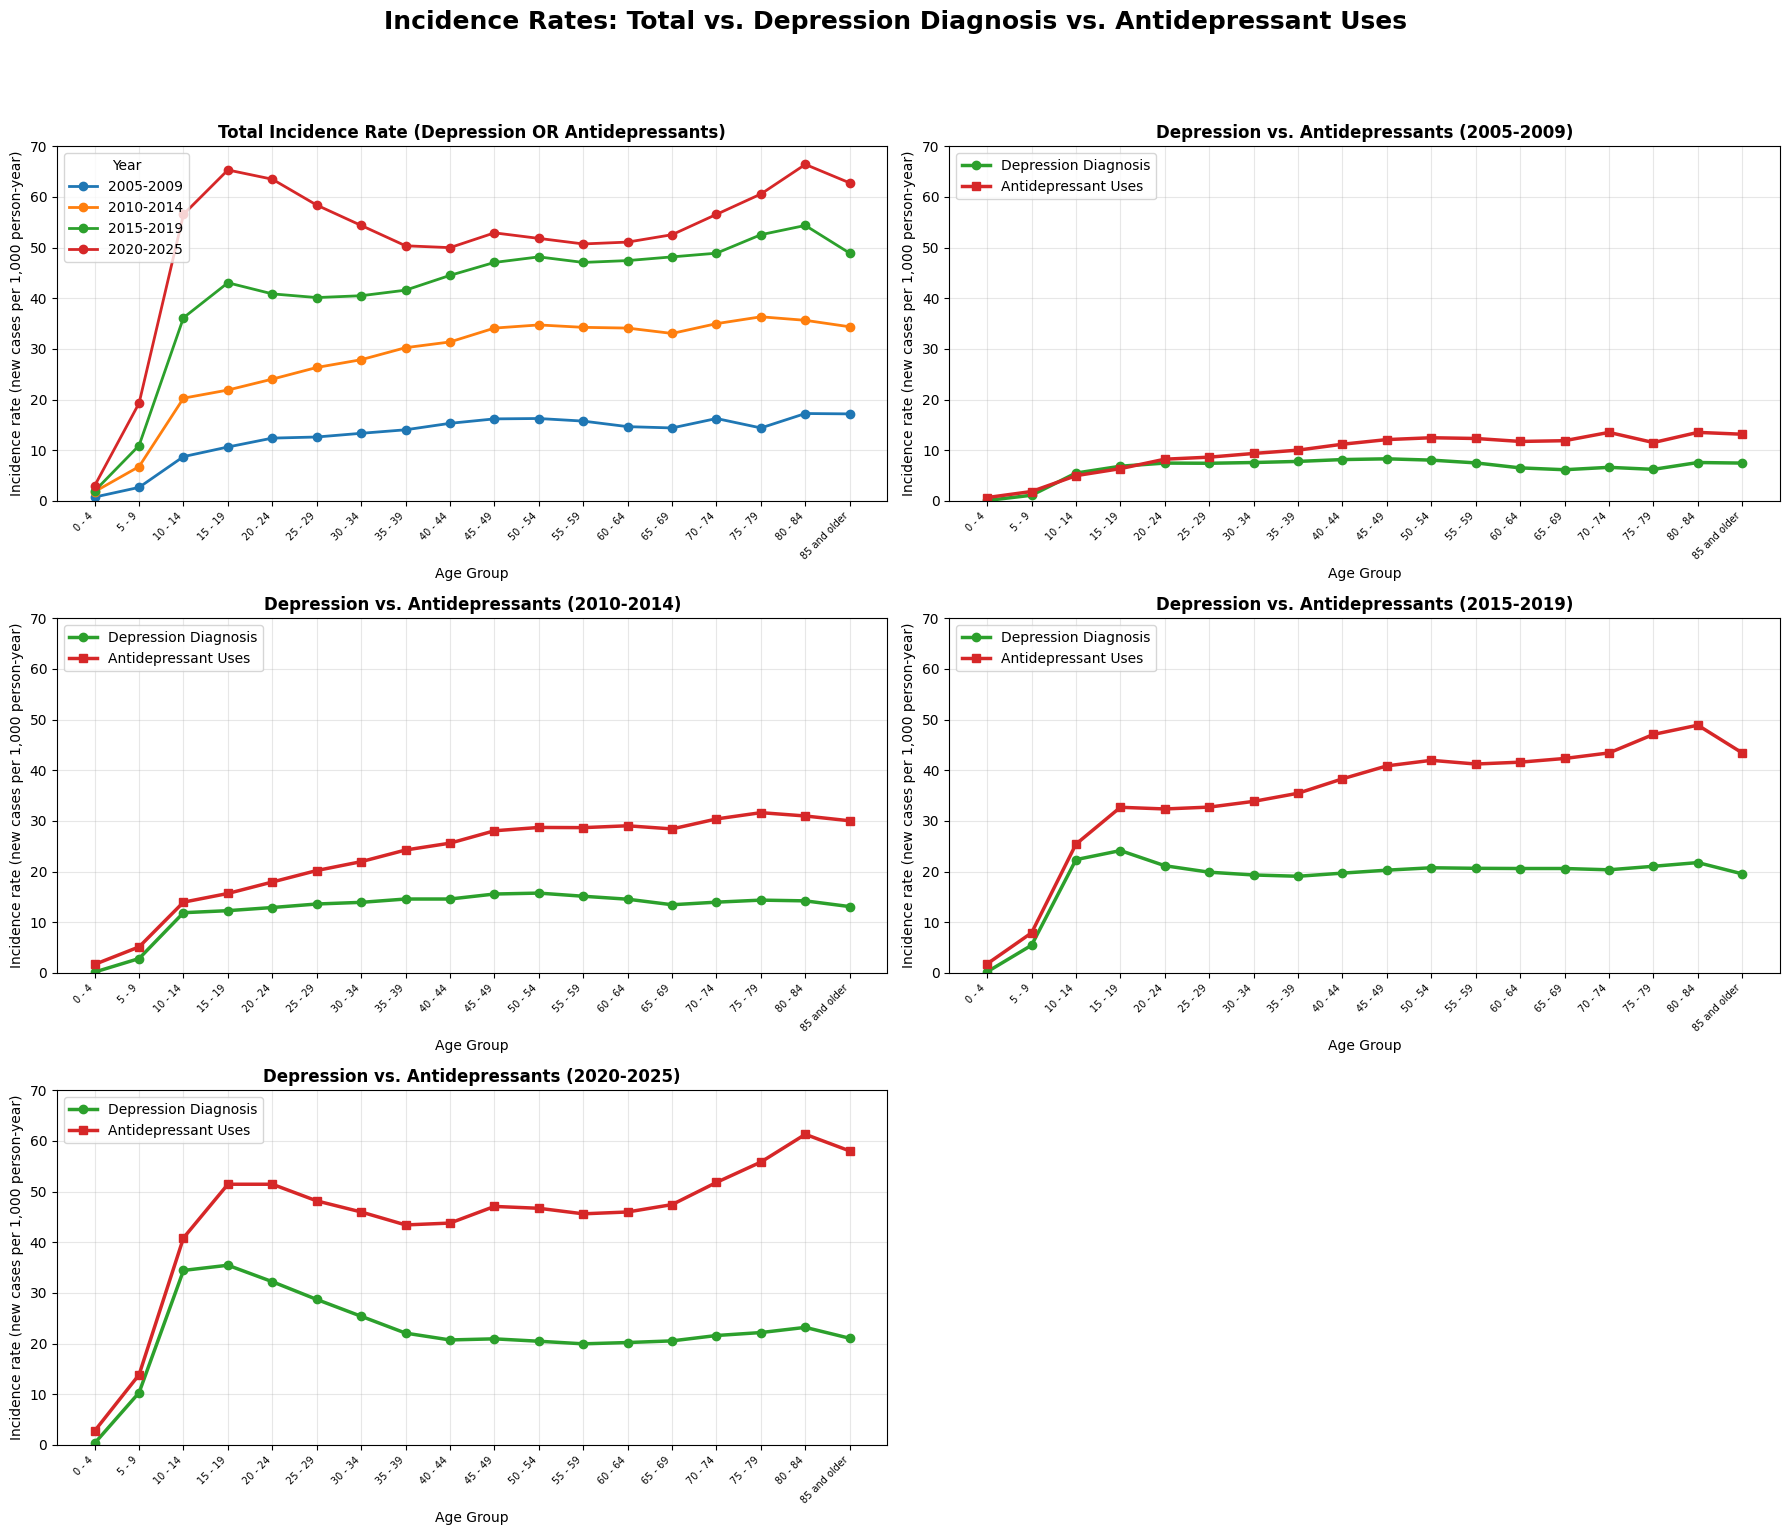

In [17]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 2, figsize=(18, 15)) # 3 rows, 2 columns for 6 subplots

# Panel [0,0]: Total Incidence Rates (Depression OR Antidepressants) for all periods
ax_total = axes[0, 0]
for y in years:
    d = df_by_year[y]
    ax_total.plot(d["Age"], d["Rate_Either_per1000py"], marker="o", linewidth=2,
                  label=period_labels[y], color=colors[y])
ax_total.set_title("Total Incidence Rate (Depression OR Antidepressants)", fontweight='bold')
ax_total.legend(title="Year", loc="upper left")
ax_total.grid(True, alpha=0.3)

# Panels for Depression vs Antidepressant Incidence Rates for all 4 periods
comparison_years_all = [2005, 2010, 2015, 2020]
panel_coords_comparisons = [(0, 1), (1, 0), (1, 1), (2, 0)] # Coordinates for the 4 comparison plots

for i, year in enumerate(comparison_years_all):
    ax = axes[panel_coords_comparisons[i]]
    d = df_by_year[year]
    ax.plot(d["Age"], d["Rate_Dep_per1000py"], marker="o", linewidth=2.5,
            label="Depression Diagnosis", color='#2ca02c')
    ax.plot(d["Age"], d["Rate_AD_per1000py"], marker="s", linewidth=2.5,
            label="Antidepressant Uses", color='#d62728')
    ax.set_title(f"Depression vs. Antidepressants ({period_labels[year]})", fontweight='bold')
    ax.legend(loc="upper left")
    ax.grid(True, alpha=0.3)

# Hide the unused last subplot if it exists (e.g., axes[2,1] in a 3x2 grid with 5 plots)
if len(panel_coords_comparisons) < (axes.shape[0] * axes.shape[1] - 1):
    axes[2,1].axis('off')

# Format all active axes
for ax in axes.flat:
    if ax.has_data(): # Only format axes that have plots
        ax.set_xlabel("Age Group", fontsize=10)
        ax.set_ylabel("Incidence rate (new cases per 1,000 person-year)", fontsize=10)
        ax.set_xticks(range(len(age_order)))
        ax.set_xticklabels(age_order, rotation=45, ha="right", fontsize=7)
        ax.set_ylim(0, 70) # Set consistent y-axis limit

fig.suptitle("Incidence Rates: Total vs. Depression Diagnosis vs. Antidepressant Uses",
             fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust layout to prevent suptitle overlap
plt.savefig("G_Combined_Incidence_Rates_3x2_All_Periods.png", dpi=300, bbox_inches='tight')
plt.show()

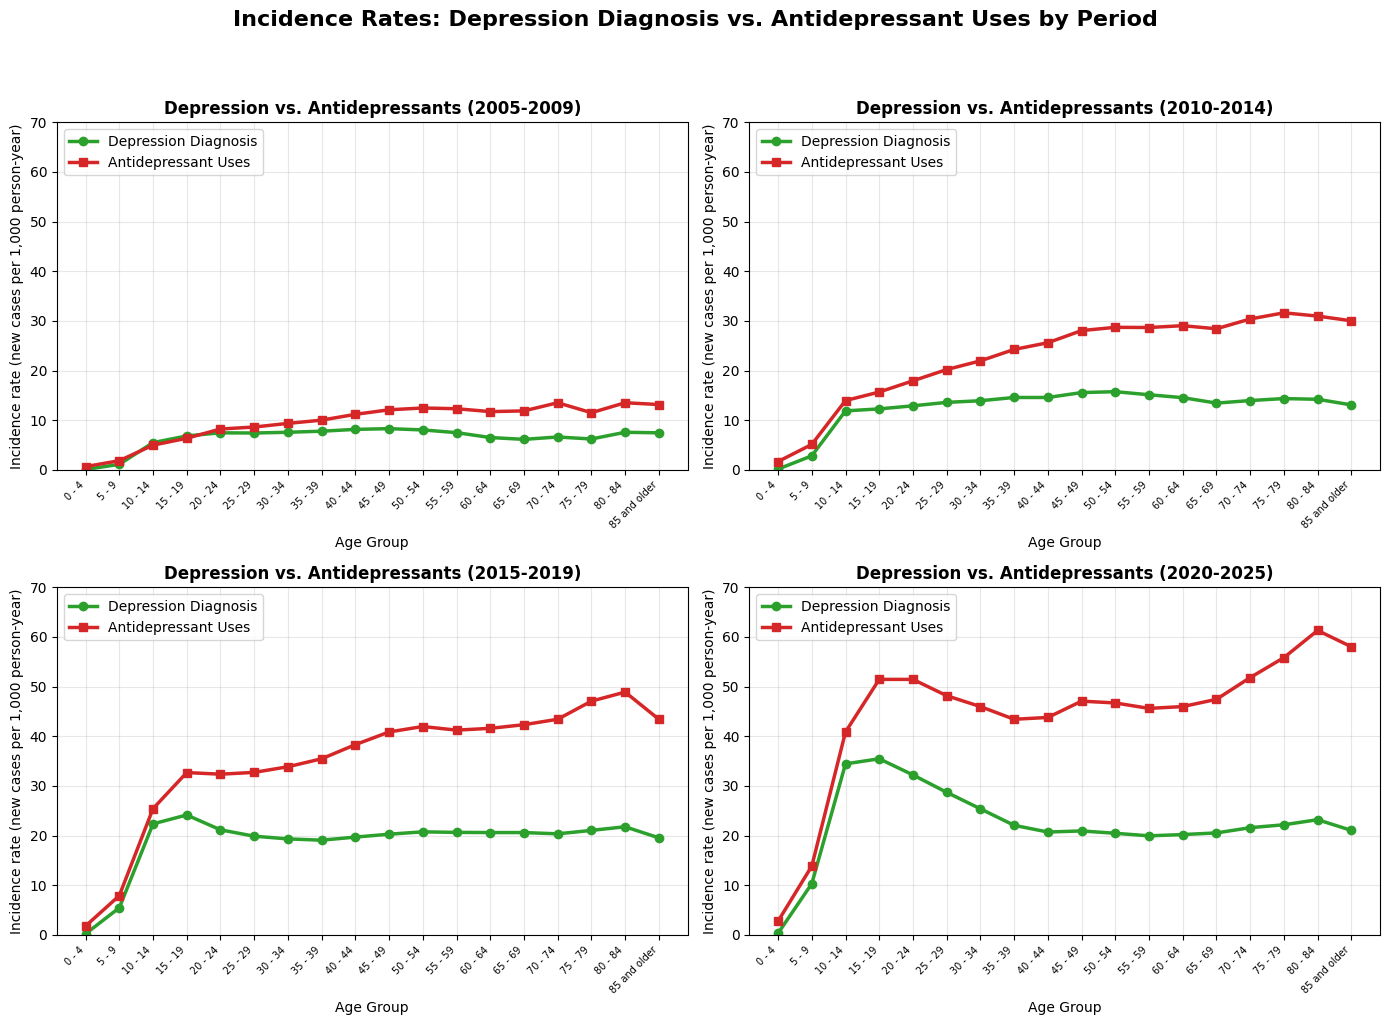

In [19]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

comparison_years_all = [2005, 2010, 2015, 2020]
panel_coords = [(0, 0), (0, 1), (1, 0), (1, 1)] # Coordinates for the 4 comparison plots

for i, year in enumerate(comparison_years_all):
    ax = axes[panel_coords[i]]
    d = df_by_year[year]
    ax.plot(d["Age"], d["Rate_Dep_per1000py"], marker="o", linewidth=2.5,
            label="Depression Diagnosis", color='#2ca02c')
    ax.plot(d["Age"], d["Rate_AD_per1000py"], marker="s", linewidth=2.5,
            label="Antidepressant Uses", color='#d62728')
    ax.set_title(f"Depression vs. Antidepressants ({period_labels[year]})", fontweight='bold')
    ax.legend(loc="upper left")
    ax.grid(True, alpha=0.3)

# Format all axes
for ax in axes.flat:
    ax.set_xlabel("Age Group", fontsize=10)
    ax.set_ylabel("Incidence rate (new cases per 1,000 person-year)", fontsize=10)
    ax.set_xticks(range(len(age_order)))
    ax.set_xticklabels(age_order, rotation=45, ha="right", fontsize=7)
    ax.set_ylim(0, 70) # Set consistent y-axis limit

fig.suptitle("Incidence Rates: Depression Diagnosis vs. Antidepressant Uses by Period",
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust layout to prevent suptitle overlap
plt.savefig("G_Depression_vs_Antidepressants_2x2_All_Periods.png", dpi=300, bbox_inches='tight')
plt.show()

In [20]:
max_dep_rate = max(df_by_year[y]['Rate_Dep_per1000py'].max() for y in years)
max_ad_rate = max(df_by_year[y]['Rate_AD_per1000py'].max() for y in years)
max_either_rate = max(df_by_year[y]['Rate_Either_per1000py'].max() for y in years)

print(f"Maximum Depression Incidence Rate (per 1000 person-years): {max_dep_rate:.2f}")
print(f"Maximum Antidepressant Incidence Rate (per 1000 person-years): {max_ad_rate:.2f}")
print(f"Maximum Combined Incidence Rate (Dep OR AD per 1000 person-years): {max_either_rate:.2f}")

overall_max_rate = max(max_dep_rate, max_ad_rate, max_either_rate)
print(f"Overall Maximum Incidence Rate observed: {overall_max_rate:.2f}")

Maximum Depression Incidence Rate (per 1000 person-years): 35.48
Maximum Antidepressant Incidence Rate (per 1000 person-years): 61.32
Maximum Combined Incidence Rate (Dep OR AD per 1000 person-years): 66.43
Overall Maximum Incidence Rate observed: 66.43
